In [1]:
import requests
import json
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from nba_api.stats.endpoints import shotchartdetail
%matplotlib inline

In [2]:
games_page = requests.get('https://api.pbpstats.com/get-games/nba?Season=2020-21&SeasonType=Regular%2BSeason')
games_data = games_page.json()

In [3]:
games_data

{'headers': [{'dateInputFormat': 'yyyy-MM-dd',
   'dateOutputFormat': 'yyyy/MM/dd',
   'field': 'Date',
   'filterable': True,
   'label': 'Date',
   'type': 'date'},
  {'field': 'HomeTeamAbbreviation', 'filterable': True, 'label': 'Home'},
  {'field': 'AwayTeamAbbreviation', 'filterable': True, 'label': 'Away'},
  {'field': 'HomePoints', 'label': 'Home Points', 'type': 'number'},
  {'field': 'AwayPoints', 'label': 'Away Points', 'type': 'number'},
  {'field': 'HomePossessions', 'label': 'Home Possessions', 'type': 'number'},
  {'field': 'AwayPossessions', 'label': 'Away Possessions', 'type': 'number'}],
 'results': [{'AwayPoints': 99,
   'AwayPossessions': 111.0,
   'AwayTeamAbbreviation': 'GSW',
   'AwayTeamId': '1610612744',
   'Date': '2020-12-22',
   'GameId': '0022000001',
   'HomePoints': 125,
   'HomePossessions': 111.0,
   'HomeTeamAbbreviation': 'BKN',
   'HomeTeamId': '1610612751'},
  {'AwayPoints': 116,
   'AwayPossessions': 104.0,
   'AwayTeamAbbreviation': 'LAC',
   'Away

In [5]:
games_df = pd.DataFrame(games_data['results'])
games_df = games_df.sort_values('Date',ascending=False)
recent_date = games_df['Date'].max()
recent_date

'2021-01-04'

In [6]:
recent_games_df = games_df[games_df['Date']==recent_date]
recent_games_df


,AwayPoints,AwayPossessions,AwayTeamAbbreviation,AwayTeamId,Date,GameId,HomePoints,HomePossessions,HomeTeamAbbreviation,HomeTeamId
99,106,109.0,SAC,1610612758,2021-01-04,0022000101,137,108.0,GSW,1610612744
98,118,106.0,IND,1610612754,2021-01-04,0022000100,116,107.0,NOP,1610612740
97,115,100.0,DET,1610612765,2021-01-04,0022000099,125,100.0,MIL,1610612749
96,113,95.0,DAL,1610612742,2021-01-04,0022000098,100,94.0,HOU,1610612745
95,126,103.0,BOS,1610612738,2021-01-04,0022000097,114,103.0,TOR,1610612761
94,90,100.0,OKC,1610612760,2021-01-04,0022000096,118,100.0,MIA,1610612748
93,113,98.0,NYK,1610612752,2021-01-04,0022000095,108,98.0,ATL,1610612737
92,101,101.0,CHA,1610612766,2021-01-04,0022000094,118,102.0,PHI,1610612755
91,83,92.0,CLE,1610612739,2021-01-04,0022000093,103,94.0,ORL,1610612753


In [7]:
recent_game_ids = list(recent_games_df['GameId'])

for game_id in recent_game_ids:
    game = requests.get(f'https://api.pbpstats.com/get-game-stats?Type=Player&GameId={game_id}')
    game_data = game.json()
    away_team_id = game_data['away_team_id']
    home_team_id = game_data['home_team_id']
    
    away_df = pd.DataFrame(game_data['stats']['Away']['FullGame'])
    break

In [12]:
game_data['team_results']['Home']['FullGame']['Points']

137

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
away_df

,DefRebounds,DefThreePtRebounds,DefTwoPtRebounds,EntityId,Minutes,Name,OffRebounds,OffThreePtRebounds,OffTwoPtRebounds,Rebounds,ShortName,2pt And 1 Free Throw Trips,Arc3Accuracy,Arc3Assists,Arc3FGA,Arc3FGM,Arc3Frequency,AssistPoints,Assisted2sPct,Assisted3sPct,Assists,AtRimAccuracy,AtRimFG3AFrequency,AtRimFGA,AtRimFGM,AtRimFrequency,AtRimPctAssisted,Avg2ptShotDistance,Avg3ptShotDistance,Corner3Accuracy,Corner3Assists,Corner3FGA,Corner3FGM,Corner3Frequency,Corner3PctAssisted,DefCorner3ReboundPct,DefFGReboundPct,DefPoss,DefThreePtReboundPct,EfgPct,FG2A,FG2APctBlocked,FG2M,FG3A,FG3APct,FG3M,FTA,Fg2Pct,Fg2aBlocked,Fg3Pct,FoulsDrawn,FtPoints,HeaveAttempts,LongMidRangeAccuracy,LongMidRangeFGA,LongMidRangeFGM,LongMidRangeFrequency,LongMidRangePctAssisted,LostBallSteals,NonHeaveArc3Accuracy,NonHeaveArc3FGA,NonHeaveArc3FGM,NonHeaveFg3Pct,NonPutbacksAssisted2sPct,OffArc3ReboundPct,OffCorner3ReboundPct,OffFGReboundPct,OffPoss,OffThreePtReboundPct,Offensive Fouls Drawn,PenaltyArc3FGA,PenaltyArc3Frequency,PenaltyDefPoss,PenaltyFG3A,PenaltyOffPoss,PenaltyOffPossExcludingTakeFouls,PenaltyOffPossPct,Points,PtsAssisted2s,PtsAssisted3s,PtsUnassisted2s,PtsUnassisted3s,SecondChanceAtRimAccuracy,SecondChanceAtRimFGA,SecondChanceAtRimFGM,SecondChanceAtRimFrequency,SecondChanceAtRimPctAssisted,SecondChanceEfgPct,SecondChanceFG2A,SecondChanceFG2M,SecondChanceFg2Pct,SecondChanceFtPoints,SecondChanceOffPoss,SecondChancePoints,SecondChancePointsPct,SecondChanceShotQualityAvg,SecondChanceTsPct,ShootingFoulsDrawnPct,ShortMidRangeAccuracy,ShortMidRangeFGA,ShortMidRangeFGM,ShortMidRangeFrequency,ShortMidRangePctAssisted,ShortMidRangePctBlocked,ShotQualityAvg,Steals,ThreePtAssists,TsPct,TwoPtShootingFoulsDrawn,TwoPtShootingFoulsDrawnPct,Usage,Arc3PctAssisted,AtRimPctBlocked,DefArc3ReboundPct,DefShortMidRangeReboundPct,DefTwoPtReboundPct,FTOffRebounds,OffFTReboundPct,PenaltyFG2A,PenaltyShotQualityAvg,SecondChanceArc3FGA,SecondChanceArc3Frequency,SecondChanceFG3A,AtRimAssists,Loose Ball Fouls Drawn,SecondChanceCorner3FGA,SecondChanceCorner3Frequency,ShortMidRangeAssists,ThreePtShootingFoulsDrawn,ThreePtShootingFoulsDrawnPct,TwoPtAssists,LiveBallTurnoverPct,LiveBallTurnovers,LostBallTurnovers,OffShortMidRangeReboundPct,OffTwoPtReboundPct,PenaltyTurnovers,SecondChanceTurnovers,SelfOReb,SelfORebPct,Turnovers,BadPassSteals,Blocked2s,BlockedShortMidRange,Blocks,BlocksRecoveredPct,DeadBallTurnovers,LostBallOutOfBoundsTurnovers,RecoveredBlocks,SecondChanceArc3Accuracy,SecondChanceArc3FGM,SecondChanceArc3PctAssisted,SecondChanceFG3M,SecondChanceFg3Pct,BadPassTurnovers,DefFTReboundPct,FTDefRebounds,Fouls,LongMidRangeAssists,NonShootingFoulsDrawn,NonShootingPenaltyNonTakeFoulsDrawn,OffLongMidRangeReboundPct,ShootingFouls,BlockedAtRim,DefAtRimReboundPct,OffAtRimReboundPct,PenaltyCorner3FGA,PenaltyCorner3Frequency,PtsPutbacks,Travels,DefLongMidRangeReboundPct,Loose Ball Fouls,Offensive Fouls
0,3.0,1.0,2.0,0,00:00,Team,6.0,1.0,5.0,9.0,Team,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,3.0,NaN,1627750,35:55,Jamal Murray,2.0,2.0,NaN,5.0,Jamal Murray,1.0,0.200000,3.0,5.0,1.0,0.250000,12.0,0.7,0.666667,4.0,1.000000,0.450000,2.0,2.0,0.100000,1.0,11.938462,29.257143,1.0,1.0,2.0,2.0,0.100000,1.0,0.75,0.103448,70.0,0.214286,0.725000,13.0,0.076923,10.0,7.0,0.350000,3.0,9.0,0.769231,1.0,0.428571,6.0,7.0,1.0,0.6,5.0,3.0,0.250000,1.0,1.0,0.250000,4.0,1.0,0.500000,0.7,0.071429,0.333333,0.0

In [7]:
(away_df['FG2M'].fillna('0').astype(int) + away_df['FG3M'].fillna('0').astype(int)).astype(str)

0      0
1     13
2      3
3      3
4      0
5      0
6      0
7      0
8      5
9      4
10     3
11     5
12     1
13     8
dtype: object

In [8]:
#Min Pts, RIM, 3pt, FTs, TS%, , Usage, RBD, Ast, TO, , +/-, Net

#create rim 3pt and FTs columns
away_df = away_df.fillna('0')
away_df['FG'] = (away_df['FG2M'].fillna('0').astype(int) + away_df['FG3M'].fillna('0').astype(int)).astype(str) + '/' + (away_df['FG2A'].fillna('0').astype(int) + away_df['FG2A'].fillna('0').astype(int)).astype(str)
away_df['rim'] = away_df['AtRimFGM'].fillna('0').astype(int).astype(str) + '/' + away_df['AtRimFGA'].fillna('0').astype(int).astype(str)
away_df['3pt'] = away_df['FG3M'].fillna('0').astype(int).astype(str) +  '/' + away_df['FG3A'].fillna('0').astype(int).astype(str)
away_df['FTs'] = away_df['FtPoints'].fillna('0').astype(int).astype(str) +  '/' + away_df['FTA'].fillna('0').astype(int).astype(str)
away_df['Ast (rim)'] = away_df['Assists'].fillna('0').astype(int).astype(str) +  '(' + away_df['AtRimAssists'].fillna('0').astype(int).astype(str) + ')'
away_df['O/DPoss'] = away_df['OffPoss'].fillna('0').astype(int).astype(str) +  '/' + away_df['DefPoss'].fillna('0').astype(int).astype(str)

columuns_to_use = ['EntityId', 'Name', 'Minutes', 'Points', 'FG', 'rim', '3pt', 'FTs', 'TsPct', 'Usage', 'Rebounds', 'Ast (rim)', 'Turnovers', 'Steals', 'Blocks', 'O/DPoss', ]

box_df = away_df[columuns_to_use]
box_df



,EntityId,Name,Minutes,Points,FG,rim,3pt,FTs,TsPct,Usage,Rebounds,Ast (rim),Turnovers,Steals,Blocks,O/DPoss
0,0,Team,00:00,0,0/0,0/0,0/0,0/0,0,0,9,0(0),0,0,0,0/0
1,1627750,Jamal Murray,35:55,36,13/26,2/2,3/7,7/9,0.75,27.2727,5,4(0),0,1,0,72/70
2,1628408,PJ Dozier,19:42,7,3/10,2/3,1/3,0/0,0.4375,17.3913,4,0(0),0,0,0,38/39
3,1628420,Monte Morris,28:34,11,3/8,2/3,1/3,4/5,0.611111,13.0435,3,6(1),0,0,0,57/58
4,1628427,Vlatko Cancar,00:55,0,0/0,0/0,0/0,0/0,0,0,0,0(0),0,0,0,2/2
5,1630181,R.J. Hampton,00:55,0,0/2,0/0,0/0,0/0,0,66.6667,1,0(0),1,0,0,2/2
6,1630192,Zeke Nnaji,00:55,0,0/0,0/0,0/0,0/0,0,0,0,0(0),0,0,0,2/2
7,1630210,Markus Howard,00:55,0,0/0,0/0,0/0,0/0,0,0,0,0(0),0,0,0,2/2
8,1630267,Facundo Campazzo,21:25,15,5/2,0/1,5/7,0/0,0.9375,17.3077,1,2(0),1,3,1,43/42
9,200794,Paul Millsap,25:13,12,4/0,0/0,4/7,0/2,0.75,14.5161,4,1(0),1,0,0,52/51


In [9]:
from nba_api.stats.endpoints import boxscoretraditionalv2
box_json = boxscoretraditionalv2.BoxScoreTraditionalV2(game_id)
box_data = json.loads(box_json.get_json())

box_data

{'resource': 'boxscore',
 'parameters': {'GameID': '0022000088',
  'StartPeriod': 0,
  'EndPeriod': 0,
  'StartRange': 0,
  'EndRange': 0,
  'RangeType': 0},
 'resultSets': [{'name': 'PlayerStats',
   'headers': ['GAME_ID',
    'TEAM_ID',
    'TEAM_ABBREVIATION',
    'TEAM_CITY',
    'PLAYER_ID',
    'PLAYER_NAME',
    'START_POSITION',
    'COMMENT',
    'MIN',
    'FGM',
    'FGA',
    'FG_PCT',
    'FG3M',
    'FG3A',
    'FG3_PCT',
    'FTM',
    'FTA',
    'FT_PCT',
    'OREB',
    'DREB',
    'REB',
    'AST',
    'STL',
    'BLK',
    'TO',
    'PF',
    'PTS',
    'PLUS_MINUS'],
   'rowSet': [['0022000088',
     1610612743,
     'DEN',
     'Denver',
     203115,
     'Will Barton',
     'F',
     '',
     '21:52',
     3,
     11,
     0.273,
     2,
     5,
     0.4,
     0,
     0,
     0.0,
     1,
     5,
     6,
     6,
     0,
     2,
     1,
     0,
     8,
     -4.0],
    ['0022000088',
     1610612743,
     'DEN',
     'Denver',
     200794,
     'Paul Millsap',
     

In [10]:
nba_box_df = pd.DataFrame(box_data['resultSets'][0]['rowSet'])
nba_box_df.columns = box_data['resultSets'][0]['headers']
nba_box_df

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,0022000088,1610612743,DEN,Denver,203115,Will Barton,F,,21:52,3.0,11.0,0.273,2.0,5.0,0.400,0.0,0.0,0.000,1.0,5.0,6.0,6.0,0.0,2.0,1.0,0.0,8.0,-4.0
1,0022000088,1610612743,DEN,Denver,200794,Paul Millsap,F,,25:13,4.0,7.0,0.571,4.0,7.0,0.571,0.0,2.0,0.000,1.0,3.0,4.0,1.0,0.0,0.0,1.0,3.0,12.0,-6.0
2,0022000088,1610612743,DEN,Denver,203999,Nikola Jokic,C,,31:42,8.0,12.0,0.667,0.0,1.0,0.000,3.0,3.0,1.000,3.0,9.0,12.0,12.0,0.0,0.0,7.0,5.0,19.0,27.0
3,0022000088,1610612743,DEN,Denver,203914,Gary Harris,G,,24:42,1.0,8.0,0.125,0.0,4.0,0.000,0.0,0.0,0.000,0.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0
4,0022000088,1610612743,DEN,Denver,1627750,Jamal Murray,G,,35:54,13.0,20.0,0.650,3.0,7.0,0.429,7.0,9.0,0.778,2.0,3.0,5.0,4.0,1.0,0.0,0.0,0.0,36.0,9.0
5,0022000088,1610612743,DEN,Denver,1628420,Monte Morris,,,28:34,3.0,7.0,0.429,1.0,3.0,0.333,4.0,5.0,0.800,1.0,2.0,3.0,6.0,0.0,0.0,0.0,0.0,11.0,13.0
6,0022000088,1610612743,DEN,Denver,203210,JaMychal Green,,,27:13,5.0,10.0,0.500,3.0,8.0,0.375,1.0,2.0,0.500,2.0,3.0,5.0,3.0,2.0,0.0,4.0,2.0,14.0,14.0
7,0022000088,1610612743,DEN,Denver,1628408,PJ Dozier,,,19:42,3.0,8.0,0.375,1.0,3.0,0.333,0.0,0.0,0.000,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,7.0,14.0
8,0022000088,1610612743,DEN,Denver,1630267,Facundo Campazzo,,,21:24,5.0,8.0,0.625,5.0,7.0,0.714,0.0,0.0,0.000,0.0,1.0,1.0,2.0,3.0,1.0,1.0,0.0,15.0,26.0
9,0022000088,1610612743,DEN,Denver,1630210,Markus Howard,,,0:56,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0


In [11]:
import numpy as np
nba_box_df['isStarter'] = np.where(nba_box_df['START_POSITION']!='',1,0 )
nba_box_df = nba_box_df[['PLAYER_ID', 'isStarter', 'PLUS_MINUS']]
nba_box_df['PLAYER_ID']= nba_box_df['PLAYER_ID'].astype('str')
box_df = box_df.merge(nba_box_df, left_on='EntityId', right_on='PLAYER_ID', how='left')
box_df = box_df.fillna('0')
box_df = box_df.sort_values(['isStarter', 'Minutes'], ascending=False)
columuns_to_use.append('PLUS_MINUS')
box_df = box_df[columuns_to_use]

box_df

<ipython-input-11-987bf3652ad9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_box_df['PLAYER_ID']= nba_box_df['PLAYER_ID'].astype('str')


,EntityId,Name,Minutes,Points,FG,rim,3pt,FTs,TsPct,Usage,Rebounds,Ast (rim),Turnovers,Steals,Blocks,O/DPoss,PLUS_MINUS
0,0,Team,00:00,0,0/0,0/0,0/0,0/0,0,0,9,0(0),0,0,0,0/0,0
1,1627750,Jamal Murray,35:55,36,13/26,2/2,3/7,7/9,0.75,27.2727,5,4(0),0,1,0,72/70,9
13,203999,Nikola Jokic,31:43,19,8/22,2/3,0/1,3/3,0.730769,26.6667,12,12(4),7,0,0,64/62,27
9,200794,Paul Millsap,25:13,12,4/0,0/0,4/7,0/2,0.75,14.5161,4,1(0),1,0,0,52/51,-6
12,203914,Gary Harris,24:42,2,1/8,1/3,0/4,0/0,0.125,13.3333,2,0(0),0,0,1,52/51,2
10,203115,Will Barton,21:52,8,3/12,0/2,2/5,0/0,0.363636,23.0769,6,6(2),1,0,2,45/44,-4
3,1628420,Monte Morris,28:34,11,3/8,2/3,1/3,4/5,0.611111,13.0435,3,6(1),0,0,0,57/58,13
11,203210,JaMychal Green,27:14,14,5/4,2/2,3/8,1/2,0.636364,23.4375,5,3(1),4,2,0,54/55,14
8,1630267,Facundo Campazzo,21:25,15,5/2,0/1,5/7,0/0,0.9375,17.3077,1,2(0),1,3,1,43/42,26
2,1628408,PJ Dozier,19:42,7,3/10,2/3,1/3,0/0,0.4375,17.3913,4,0(0),0,0,0,38/39,14


In [12]:
games_df

,AwayPoints,AwayPossessions,AwayTeamAbbreviation,AwayTeamId,Date,GameId,HomePoints,HomePossessions,HomeTeamAbbreviation,HomeTeamId
90,124,97.0,DEN,1610612743,2021-01-03,0022000088,109,96.0,MIN,1610612750
89,122,106.0,POR,1610612757,2021-01-03,0022000092,137,106.0,GSW,1610612744
88,112,92.0,LAC,1610612746,2021-01-03,0022000091,107,92.0,PHX,1610612756
87,108,100.0,DAL,1610612742,2021-01-03,0022000090,118,100.0,CHI,1610612741
86,130,106.0,UTA,1610612762,2021-01-03,0022000089,109,106.0,SAS,1610612759
85,108,94.0,LAL,1610612747,2021-01-03,0022000087,94,95.0,MEM,1610612763
84,123,107.0,WAS,1610612764,2021-01-03,0022000086,122,107.0,BKN,1610612751
83,122,95.0,BOS,1610612738,2021-01-03,0022000085,120,94.0,DET,1610612765
79,96,95.0,CLE,1610612739,2021-01-02,0022000083,91,95.0,ATL,1610612737
77,94,97.0,SAC,1610612758,2021-01-02,0022000079,102,97.0,HOU,1610612745


In [13]:
game_data.keys()


dict_keys(['away_team_abbreviation', 'away_team_id', 'date', 'header_order_map', 'home_team_abbreviation', 'home_team_id', 'league', 'season', 'season_type', 'stats', 'table_data_options', 'team_results'])

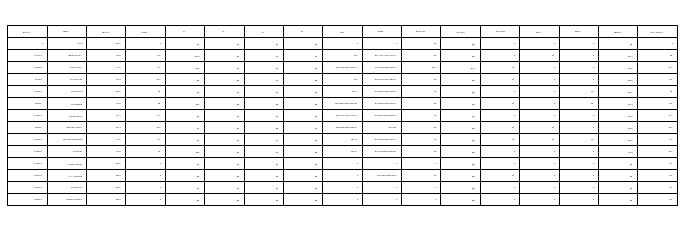

In [14]:
from matplotlib.backends.backend_pdf import PdfPages
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=box_df.values,colLabels=box_df.columns,loc='center')

#https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot
pp = PdfPages("foo.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

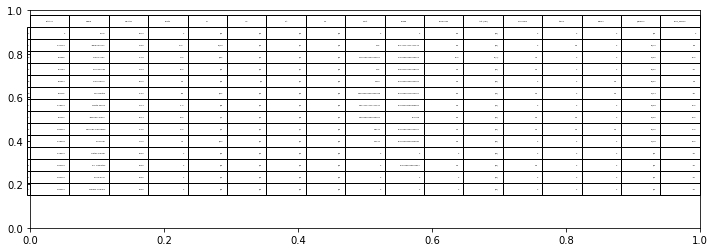

<Figure size 432x288 with 0 Axes>

In [19]:
from pandas.plotting import table

fig, ax = plt.subplots(figsize=(12,4))
table(ax, box_df, loc="upper center")
plt.show()
plt.savefig('test.pdf')

In [23]:
box_df.style.render()


'<style  type="text/css" >\n</style><table id="T_3a92e4f7_4f0c_11eb_b385_c0e4346aafa4" ><thead>    <tr>        <th class="blank level0" ></th>        <th class="col_heading level0 col0" >EntityId</th>        <th class="col_heading level0 col1" >Name</th>        <th class="col_heading level0 col2" >Minutes</th>        <th class="col_heading level0 col3" >Points</th>        <th class="col_heading level0 col4" >FG</th>        <th class="col_heading level0 col5" >rim</th>        <th class="col_heading level0 col6" >3pt</th>        <th class="col_heading level0 col7" >FTs</th>        <th class="col_heading level0 col8" >TsPct</th>        <th class="col_heading level0 col9" >Usage</th>        <th class="col_heading level0 col10" >Rebounds</th>        <th class="col_heading level0 col11" >Ast (rim)</th>        <th class="col_heading level0 col12" >Turnovers</th>        <th class="col_heading level0 col13" >Steals</th>        <th class="col_heading level0 col14" >Blocks</th>        <th class="